In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
weldeffects = np.array([[74,57,53,52,42,33,20,40,60,30],[.120,.095,.090,.088,.025,.050,.020,.058,.100,.045]],np.float64)
print(weldeffects)

[[7.4e+01 5.7e+01 5.3e+01 5.2e+01 4.2e+01 3.3e+01 2.0e+01 4.0e+01 6.0e+01
  3.0e+01]
 [1.2e-01 9.5e-02 9.0e-02 8.8e-02 2.5e-02 5.0e-02 2.0e-02 5.8e-02 1.0e-01
  4.5e-02]]


In [58]:
def linear(x,m,b):
    return m*x+b

params, covariance = curve_fit(linear, weldeffects[0], weldeffects[1])

linear_fit = linear(weldeffects[0],params[0],params[1])

params

array([ 0.00194788, -0.02069734])

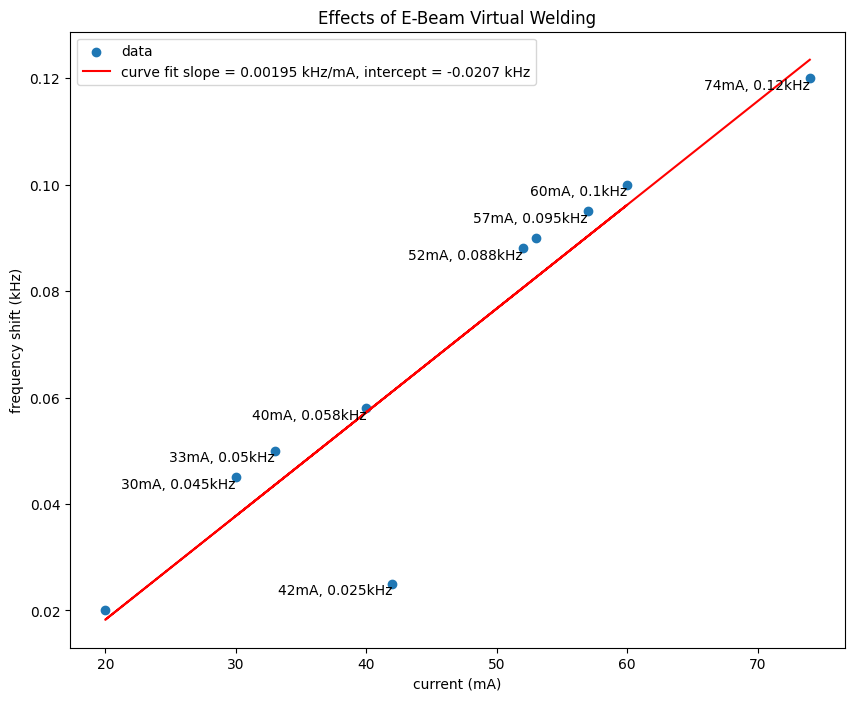

In [5]:
plt.figure(figsize=(10, 8))

plt.scatter(weldeffects[0],weldeffects[1], label = 'data')
plt.plot(weldeffects[0],linear_fit, color='r', label = f'curve fit slope = {params[0]:.3g} kHz/mA, intercept = {params[1]:.3g} kHz') #label = f'slope = {int(params[0]*100000)}')
plt.title('Effects of E-Beam Virtual Welding')
plt.xlabel('current (mA)')
plt.ylabel('frequency shift (kHz)')
plt.legend()

for i, txt in enumerate(weldeffects[1]):
    if i != 2 and i !=6:
        plt.text(weldeffects[0][i],weldeffects[1][i], f'{int(weldeffects[0][i])}mA, {weldeffects[1][i]}kHz', ha='right', va='top')

#plt.text(25,0,f'The slope of the curve appears to be {params[0]:.3g} kHz per mA')

plt.show()

In [50]:
#Now lets make the tool reusable
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def plot_curve_fit(df,curve, p0, sclabel='',pltlable=''):
    x, y = df
    
    params, covariance = curve_fit(curve, x, y,p0=p0)
    y_fit = curve(x,*params)


    plt.scatter(x,y, label=sclabel)
    plt.plot(x,y_fit, color = 'r', label=pltlable)

    return y_fit, params

In [33]:
def polynomial(x, *args):
    sum = 0
    for i in range(len(args)):
        sum += args[i] * x ** (i)
    return sum

x = np.linspace(0,10,11)
y = polynomial(x,0,1)

p0=[0,0,0]

params, cov = curve_fit(polynomial,x,y,p0=p0)

y_fit = polynomial(x,*params)

/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([3.27821626e-25, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
       4.00000000e+00, 5.00000000e+00, 6.00000000e+00, 7.00000000e+00,
       8.00000000e+00, 9.00000000e+00, 1.00000000e+01])

array([-0.02069734,  0.00194788])

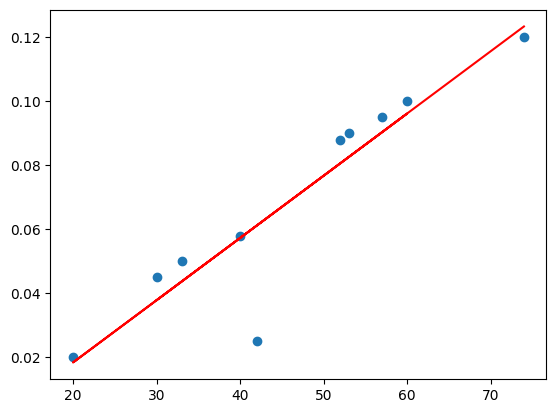

In [61]:
p0 = [0,0]

vals = plot_curve_fit(weldeffects,polynomial,p0)
vals[1]